# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
load_dotenv("jfk.env")

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\johnf\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q='Bitcoin',
    language='en',
    page_size=100,
    sort_by='relevancy'
)

btc_headlines['totalResults']

10380

In [6]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q='Ethereum',
    language='en',
    page_size=100,
    sort_by='relevancy'
)

eth_headlines['totalResults']

3995

In [7]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

In [8]:
for article in btc_headlines['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        btc_sentiments.append({
        'text': text,
        'date': date,
        'compound': compound,
        'positive' : pos,
        'neutral' : neu,
        'negative': neg
        }
        )
    except AttributeError:
        pass
btc_df = pd.DataFrame(btc_sentiments)

In [9]:
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-04-27,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,0.0,1.000
1,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.0,0.829
2,2021-04-13,The crypto industry as a whole has seen a mome...,0.6124,0.135,0.0,0.865
3,2021-04-23,Cryptocurrency prices continued to tumble Frid...,0.0000,0.000,0.0,1.000
4,2021-04-27,image copyrightGetty Images\r\nimage captionEl...,0.7003,0.167,0.0,0.833


In [10]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

In [11]:
for article in eth_headlines['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        eth_sentiments.append({
        'text': text,
        'date': date,
        'compound': compound,
        'positive' : pos,
        'neutral' : neu,
        'negative': neg
        }
        )
    except AttributeError:
        pass
eth_df = pd.DataFrame(eth_sentiments)

In [12]:
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-05-04,Their investors call them disruptive innovator...,-0.4019,0.072,0.15,0.778
1,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.00,0.829
2,2021-04-20,Venmo is jumping aboard the cryptocurrency ban...,0.0258,0.034,0.00,0.966
3,2021-05-01,New York (CNN Business)Bitcoin prices continue...,0.0000,0.000,0.00,1.000
4,2021-05-03,"The creators behind CryptoPunks, one of the mo...",0.4754,0.091,0.00,0.909


In [13]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.113676,0.057780,0.027970,0.914260
std,0.338382,0.066689,0.045673,0.084183
min,-0.680800,0.000000,0.000000,0.662000
25%,0.000000,0.000000,0.000000,0.849750
50%,0.000000,0.048000,0.000000,0.925500
75%,0.340000,0.097750,0.060000,1.000000
max,0.817600,0.269000,0.219000,1.000000


In [14]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.106695,0.049800,0.022770,0.927440
std,0.340939,0.065688,0.045296,0.078782
min,-0.918600,0.000000,0.000000,0.694000
25%,0.000000,0.000000,0.000000,0.882250
50%,0.000000,0.000000,0.000000,0.943500
75%,0.323650,0.077500,0.039250,1.000000
max,0.827100,0.256000,0.289000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the highest mean positive score of 0.589.

Q: Which coin had the highest compound score?

A: Ethereum has the highest compound score of 0.829.

Q. Which coin had the highest positive score?

A: Bitcoin has the highest positive score of 0.269.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [15]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [16]:
# Instantiate the lemmatizer
wnl = WordNetLemmatizer()

# Create a list of stopwords
print(stopwords.words('english'))

# Expand the default stopwords list if necessary


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(text)
    words = list(filter(lambda w: w.lower(), words))
    words = list(filter(lambda t: t not in punctuation, words))
    words = list(filter(lambda t: t.lower() not in text, words))
    lemmatizer = WordNetLemmatizer()
    tokens = [wnl.lemmatize(word) for word in words]
    print(words)
    return tokens
    
    # Remove the punctuation from text

   
    # Create a tokenized list of the words
    
    
    # Lemmatize words into root words

   
    # Convert the words to lowercase
    
    
    # Remove the stop words
    
    


In [18]:
# Create a new tokens column for Bitcoin
btc_df['tokens']=btc_df.text.apply(tokenizer)

['Tesla', 'CFO', 'Zach', 'Kirkhorn', 'Monday', 'Instead']
['Cryptocurrency', 'PayPal', 'Bitcoin', 'Ethereum', 'Bitcoin', 'Cash', 'Litecoin', 'Venmo', 'With']
[]
['Cryptocurrency', 'Friday', 'Bitcoin', 'March', 'Bitcoin']
['copyrightGetty', 'Images', 'captionElon', 'Musk', 'Tesla', 'Tesla', 'Bitcoin']
['Earth', 'Day', 'So', 'Jack', 'Dorsey']
['Venmo', 'Tuesday', 'Venmo', 'Four']
['New', 'York', 'CNN', 'Business', 'Bitcoin', 'Saturday', 'But']
['Its', 'Robinhood', 'Christine', 'Brown', 'Robinhoods']
['By', 'Reuters', 'Staff', 'Reuters', '-MicroStrategy', 'Inc', 'Monday', 'Shares']
['Crusoe']
['We', 'Dogecoin', 'DOGE']
['By', 'Reuters', 'Staff', 'April', 'Reuters', 'MicroStrategy', 'Inc', 'Monday', 'R…']
['Jack', 'Dorsey', 'CEO', 'Twitter', 'Wednesday', '``', "''", 'Elon', 'Musk', '``', 'True', '``', 'BBC', '``']
['Coinswitch', 'Kuber', 'India', 'Thursday', 'Indi…']
['By', 'Reuters', 'Staff', 'FILE', 'PHOTO', 'Tesla', 'Santa', 'Clarita', 'California', 'U.S.', 'October', 'REUTERS/Mike', 'B

In [19]:
btc_df

,date,text,compound,positive,negative,neutral,tokens
0,2021-04-27,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,0.000,1.000,"[Tesla, CFO, Zach, Kirkhorn, Monday, Instead]"
1,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.000,0.829,"[Cryptocurrency, PayPal, Bitcoin, Ethereum, Bi..."
2,2021-04-13,The crypto industry as a whole has seen a mome...,0.6124,0.135,0.000,0.865,[]
3,2021-04-23,Cryptocurrency prices continued to tumble Frid...,0.0000,0.000,0.000,1.000,"[Cryptocurrency, Friday, Bitcoin, March, Bitcoin]"
4,2021-04-27,image copyrightGetty Images\r\nimage captionEl...,0.7003,0.167,0.000,0.833,"[copyrightGetty, Images, captionElon, Musk, Te..."
...,...,...,...,...,...,...,...
95,2021-04-11,"Bitcoin surged above $60,000 for the first tim...",0.0000,0.000,0.000,1.000,"[Bitcoin, March, Saturday, Sunday, Bitstamp]"
96,2021-04-22,"April\r\n22, 2021\r\n9 min read\r\nThis articl...",-0.3400,0.000,0.072,0.928,"[April, Spanish, AI, Errors, Opinions, Entrepr..."
97,2021-04-26,"April\r\n26, 2021\r\n4 min read\r\nThis articl...",-0.3400,0.000,0.066,0.934,"[April, Spanish, AI, Errors, Every]"
98,2021-05-05,This article was translated from our Spanish e...,0.1027,0.075,0.065,0.860,"[Spanish, Errors, Cryptocurrencies]"


In [20]:
# Create a new tokens column for Ethereum
eth_df['tokens']=eth_df.text.apply(tokenizer)

['Their', 'Detractors', 'North', 'Carolina', 'Attorney', 'General', 'Josh', 'Stein', 'But', 'Leda', 'Health', 'Madison', 'Campbell', 'Liesel', 'Vaidya']
['Cryptocurrency', 'PayPal', 'Bitcoin', 'Ethereum', 'Bitcoin', 'Cash', 'Litecoin', 'Venmo', 'With']
['Venmo', 'Tuesday', 'Venmo', 'Four']
['New', 'York', 'CNN', 'Business', 'Bitcoin', 'Saturday', 'But']
['CryptoPunks', 'NFT', 'Meebits', '3D']
['ConsenSys', 'Ethereum', 'J.P.', 'Morgan', 'Mastercard', 'UBS', 'AG']
['By', 'Reuters', 'Staff', 'FILE', 'PHOTO', 'Ethereum', 'February', 'REUTERS/Dado', 'Ruvic/Illustration', 'SINGAPORE…']
['Ethereum', 'February', 'REUTERS/Dado', 'Ruvic/IllustrationCryptocurrency']
['Its', 'Robinhood', 'Christine', 'Brown', 'Robinhoods']
['This', 'StockMarketUS', 'Edge', 'Monday', 'Morning', 'U.S.', 'Monday']
['Spanish', 'AI', 'Errors', 'Cryptocurrencies', 'Vitalik', 'Buterin']
['Non-fungible', 'NFTs', 'Topps', 'NFT-based']
['By', 'Reuters', 'Staff', 'SINGAPORE', 'May', 'Reuters', 'Cryptocurrency', 'Monday', 'Eu

In [21]:
eth_df

,date,text,compound,positive,negative,neutral,tokens
0,2021-05-04,Their investors call them disruptive innovator...,-0.4019,0.072,0.150,0.778,"[Their, Detractors, North, Carolina, Attorney,..."
1,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.000,0.829,"[Cryptocurrency, PayPal, Bitcoin, Ethereum, Bi..."
2,2021-04-20,Venmo is jumping aboard the cryptocurrency ban...,0.0258,0.034,0.000,0.966,"[Venmo, Tuesday, Venmo, Four]"
3,2021-05-01,New York (CNN Business)Bitcoin prices continue...,0.0000,0.000,0.000,1.000,"[New, York, CNN, Business, Bitcoin, Saturday, ..."
4,2021-05-03,"The creators behind CryptoPunks, one of the mo...",0.4754,0.091,0.000,0.909,"[CryptoPunks, NFT, Meebits, 3D]"
...,...,...,...,...,...,...,...
95,2021-04-30,TOKYO (Reuters) - The U.S. dollar skidded towa...,0.4404,0.133,0.054,0.813,"[TOKYO, Reuters, U.S., Friday, Federal, Reserve]"
96,2021-04-27,The Golden State Warriors are bouncing into th...,0.0000,0.000,0.000,1.000,"[Golden, State, Warriors, NFT, Tuesday]"
97,2021-04-19,Yuriko Nakao/Getty Images\r\nWall Street Bets ...,0.6369,0.157,0.000,0.843,"[Yuriko, Nakao/Getty, Images, Wall, Street, Be..."
98,2021-04-20,In this photo illustration a Venmo mobile paym...,0.0000,0.000,0.000,1.000,"[In, Venmo, Igor, Golovniov/SOPA, Images/Light..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [67]:
from collections import Counter
from nltk import ngrams

In [76]:
btc_corpus = btc_df.text.str.cat()
btc_bigram = ngrams(tokenizer(btc_corpus), 1)

['Tesla', 'CFO', 'Zach', 'Kirkhorn', 'Monday', 'PayPal', 'Litecoin', 'Venmo', 'Friday', 'copyrightGetty', 'Images', 'captionElon', 'Musk', 'Tesla', 'Tesla', 'Earth', 'Jack', 'Dorsey', 'Venmo', 'Tuesday', 'Venmo', 'Four', 'York', 'CNN', 'Business', 'Saturday', 'Robinhood', 'Christine', 'Brown', 'Robinhoods', 'Reuters', 'Staff', 'Reuters', '-MicroStrategy', 'Monday', 'Crusoe', 'Dogecoin', 'DOGE', 'Reuters', 'Staff', 'April', 'Reuters', 'MicroStrategy', 'Monday', 'Jack', 'Dorsey', 'CEO', 'Twitter', 'Wednesday', '``', "''", 'Elon', 'Musk', '``', 'True', '``', 'BBC', '``', 'Coinswitch', 'Kuber', 'India', 'Thursday', 'Indi…', 'Reuters', 'Staff', 'FILE', 'PHOTO', 'Tesla', 'Santa', 'Clarita', 'California', 'U.S.', 'October', 'REUTERS/Mike', 'Blake', 'Reuters', 'Tesla', 'Reuters', 'Staff', 'April', 'Reuters', 'Sunday', 'Reuters', 'Staff', 'LONDON', 'April', 'Reuters', 'Tuesday', 'Reuters', 'Staff', 'FILE', 'PHOTO', 'REUTERS/Dado', 'Ruvic/Illustration/File', 'Photo', 'LON…', 'Marseille', 'France

In [77]:
# Generate the Bitcoin N-grams where N=2
btc_word_counts = Counter(btc_bigram)
print(dict(btc_word_counts))

{('Tesla',): 11, ('CFO',): 1, ('Zach',): 1, ('Kirkhorn',): 1, ('Monday',): 8, ('PayPal',): 1, ('Litecoin',): 3, ('Venmo',): 3, ('Friday',): 5, ('copyrightGetty',): 1, ('Images',): 6, ('captionElon',): 1, ('Musk',): 5, ('Earth',): 1, ('Jack',): 3, ('Dorsey',): 3, ('Tuesday',): 7, ('Four',): 1, ('York',): 3, ('CNN',): 1, ('Business',): 1, ('Saturday',): 3, ('Robinhood',): 2, ('Christine',): 1, ('Brown',): 1, ('Robinhoods',): 1, ('Reuters',): 41, ('Staff',): 19, ('-MicroStrategy',): 1, ('Crusoe',): 1, ('Dogecoin',): 1, ('DOGE',): 1, ('April',): 21, ('MicroStrategy',): 2, ('CEO',): 3, ('Twitter',): 2, ('Wednesday',): 12, ('``',): 9, ("''",): 5, ('Elon',): 4, ('True',): 1, ('BBC',): 1, ('Coinswitch',): 1, ('Kuber',): 1, ('India',): 1, ('Thursday',): 5, ('Indi…',): 1, ('FILE',): 5, ('PHOTO',): 5, ('Santa',): 2, ('Clarita',): 2, ('California',): 2, ('U.S.',): 10, ('October',): 2, ('REUTERS/Mike',): 2, ('Blake',): 1, ('Sunday',): 4, ('LONDON',): 2, ('REUTERS/Dado',): 13, ('Ruvic/Illustration/F

In [79]:
btc_bigram_2 = ngrams(tokenizer(btc_corpus), 2)

['Tesla', 'CFO', 'Zach', 'Kirkhorn', 'Monday', 'PayPal', 'Litecoin', 'Venmo', 'Friday', 'copyrightGetty', 'Images', 'captionElon', 'Musk', 'Tesla', 'Tesla', 'Earth', 'Jack', 'Dorsey', 'Venmo', 'Tuesday', 'Venmo', 'Four', 'York', 'CNN', 'Business', 'Saturday', 'Robinhood', 'Christine', 'Brown', 'Robinhoods', 'Reuters', 'Staff', 'Reuters', '-MicroStrategy', 'Monday', 'Crusoe', 'Dogecoin', 'DOGE', 'Reuters', 'Staff', 'April', 'Reuters', 'MicroStrategy', 'Monday', 'Jack', 'Dorsey', 'CEO', 'Twitter', 'Wednesday', '``', "''", 'Elon', 'Musk', '``', 'True', '``', 'BBC', '``', 'Coinswitch', 'Kuber', 'India', 'Thursday', 'Indi…', 'Reuters', 'Staff', 'FILE', 'PHOTO', 'Tesla', 'Santa', 'Clarita', 'California', 'U.S.', 'October', 'REUTERS/Mike', 'Blake', 'Reuters', 'Tesla', 'Reuters', 'Staff', 'April', 'Reuters', 'Sunday', 'Reuters', 'Staff', 'LONDON', 'April', 'Reuters', 'Tuesday', 'Reuters', 'Staff', 'FILE', 'PHOTO', 'REUTERS/Dado', 'Ruvic/Illustration/File', 'Photo', 'LON…', 'Marseille', 'France

In [80]:
btc_word_counts_2 = Counter(btc_bigram_2)
print(dict(btc_word_counts_2))

{('Tesla', 'CFO'): 1, ('CFO', 'Zach'): 1, ('Zach', 'Kirkhorn'): 1, ('Kirkhorn', 'Monday'): 1, ('Monday', 'PayPal'): 1, ('PayPal', 'Litecoin'): 1, ('Litecoin', 'Venmo'): 1, ('Venmo', 'Friday'): 1, ('Friday', 'copyrightGetty'): 1, ('copyrightGetty', 'Images'): 1, ('Images', 'captionElon'): 1, ('captionElon', 'Musk'): 1, ('Musk', 'Tesla'): 3, ('Tesla', 'Tesla'): 1, ('Tesla', 'Earth'): 1, ('Earth', 'Jack'): 1, ('Jack', 'Dorsey'): 3, ('Dorsey', 'Venmo'): 1, ('Venmo', 'Tuesday'): 1, ('Tuesday', 'Venmo'): 1, ('Venmo', 'Four'): 1, ('Four', 'York'): 1, ('York', 'CNN'): 1, ('CNN', 'Business'): 1, ('Business', 'Saturday'): 1, ('Saturday', 'Robinhood'): 1, ('Robinhood', 'Christine'): 1, ('Christine', 'Brown'): 1, ('Brown', 'Robinhoods'): 1, ('Robinhoods', 'Reuters'): 1, ('Reuters', 'Staff'): 19, ('Staff', 'Reuters'): 5, ('Reuters', '-MicroStrategy'): 1, ('-MicroStrategy', 'Monday'): 1, ('Monday', 'Crusoe'): 1, ('Crusoe', 'Dogecoin'): 1, ('Dogecoin', 'DOGE'): 1, ('DOGE', 'Reuters'): 1, ('Staff', 'A

In [81]:
btc_bigram_counts = (btc_word_counts_2).most_common(20)
print(btc_bigram_counts)

[(('Reuters', 'Staff'), 19), (('April', 'Reuters'), 8), (('Staff', 'April'), 6), (('Staff', 'Reuters'), 5), (('Staff', 'FILE'), 5), (('FILE', 'PHOTO'), 5), (('Opinions', 'Entrepreneur'), 5), (('``', "''"), 4), (('Elon', 'Musk'), 4), (('Coinbase', 'Global'), 4), (('Spanish', 'Errors'), 4), (('Musk', 'Tesla'), 3), (('Jack', 'Dorsey'), 3), (('REUTERS/Dado', 'Ruvic/Illustration/File'), 3), (('REUTERS/Dado', 'Ruvic/Illustration'), 3), (('Global', 'Wednesday'), 3), (('Friday', 'U.S.'), 3), (('February', 'REUTERS/Dado'), 3), (('Dorsey', 'CEO'), 2), (('CEO', 'Twitter'), 2)]


In [74]:
eth_corpus = eth_df.text.str.cat()
eth_bigram = ngrams(tokenizer(eth_corpus), 1)

['Detractors', 'North', 'Carolina', 'Attorney', 'General', 'Josh', 'Stein', 'Leda', 'Health', 'Madison', 'Campbell', 'Liesel', 'Vaidya', 'PayPal', 'Litecoin', 'Venmo', 'Venmo', 'Tuesday', 'Venmo', 'York', 'CNN', 'Business', 'Saturday', 'CryptoPunks', 'Meebits', '3D', 'ConsenSys', 'J.P.', 'Morgan', 'Mastercard', 'UBS', 'Reuters', 'Staff', 'February', 'REUTERS/Dado', 'Ruvic/Illustration', 'SINGAPORE…', 'February', 'REUTERS/Dado', 'Ruvic/IllustrationCryptocurrency', 'Robinhood', 'Christine', 'Brown', 'Robinhoods', 'StockMarketUS', 'Edge', 'Monday', 'Morning', 'U.S.', 'Monday', 'Spanish', 'Errors', 'Vitalik', 'Buterin', 'NFTs', 'Topps', 'NFT-based', 'Reuters', 'Staff', 'SINGAPORE', 'Reuters', 'Monday', 'Europe…', 'February', 'REUTERS/Dado', 'Ruvic/IllustrationCryptocurrency', 'Jones', 'Stre…', 'Reuters', 'Staff', 'EIB', 'SINGAPORE', 'Reuters', 'Monday', 'Reuters', 'Staff', 'February', 'REUTERS/Dado', 'Ruvic/Illustration', 'SINGAPORE…', 'Sotheby', 'Tuesday', 'Banksy', '``', 'Love', "''", 'A

In [82]:
eth_word_counts = Counter(eth_bigram)
print(dict(eth_word_counts))

{('Detractors',): 1, ('North',): 1, ('Carolina',): 1, ('Attorney',): 1, ('General',): 1, ('Josh',): 1, ('Stein',): 1, ('Leda',): 1, ('Health',): 1, ('Madison',): 1, ('Campbell',): 1, ('Liesel',): 1, ('Vaidya',): 1, ('PayPal',): 2, ('Litecoin',): 1, ('Venmo',): 8, ('Tuesday',): 10, ('York',): 1, ('CNN',): 2, ('Business',): 1, ('Saturday',): 2, ('CryptoPunks',): 1, ('Meebits',): 1, ('3D',): 1, ('ConsenSys',): 2, ('J.P.',): 2, ('Morgan',): 2, ('Mastercard',): 3, ('UBS',): 1, ('Reuters',): 25, ('Staff',): 9, ('February',): 8, ('REUTERS/Dado',): 11, ('Ruvic/Illustration',): 3, ('SINGAPORE…',): 2, ('Ruvic/IllustrationCryptocurrency',): 2, ('Robinhood',): 1, ('Christine',): 1, ('Brown',): 1, ('Robinhoods',): 1, ('StockMarketUS',): 1, ('Edge',): 1, ('Monday',): 11, ('Morning',): 1, ('U.S.',): 6, ('Spanish',): 4, ('Errors',): 4, ('Vitalik',): 2, ('Buterin',): 2, ('NFTs',): 5, ('Topps',): 2, ('NFT-based',): 1, ('SINGAPORE',): 2, ('Europe…',): 1, ('Jones',): 4, ('Stre…',): 1, ('EIB',): 2, ('Sothe

In [83]:
eth_bigram_2 = ngrams(tokenizer(eth_corpus), 2)

['Detractors', 'North', 'Carolina', 'Attorney', 'General', 'Josh', 'Stein', 'Leda', 'Health', 'Madison', 'Campbell', 'Liesel', 'Vaidya', 'PayPal', 'Litecoin', 'Venmo', 'Venmo', 'Tuesday', 'Venmo', 'York', 'CNN', 'Business', 'Saturday', 'CryptoPunks', 'Meebits', '3D', 'ConsenSys', 'J.P.', 'Morgan', 'Mastercard', 'UBS', 'Reuters', 'Staff', 'February', 'REUTERS/Dado', 'Ruvic/Illustration', 'SINGAPORE…', 'February', 'REUTERS/Dado', 'Ruvic/IllustrationCryptocurrency', 'Robinhood', 'Christine', 'Brown', 'Robinhoods', 'StockMarketUS', 'Edge', 'Monday', 'Morning', 'U.S.', 'Monday', 'Spanish', 'Errors', 'Vitalik', 'Buterin', 'NFTs', 'Topps', 'NFT-based', 'Reuters', 'Staff', 'SINGAPORE', 'Reuters', 'Monday', 'Europe…', 'February', 'REUTERS/Dado', 'Ruvic/IllustrationCryptocurrency', 'Jones', 'Stre…', 'Reuters', 'Staff', 'EIB', 'SINGAPORE', 'Reuters', 'Monday', 'Reuters', 'Staff', 'February', 'REUTERS/Dado', 'Ruvic/Illustration', 'SINGAPORE…', 'Sotheby', 'Tuesday', 'Banksy', '``', 'Love', "''", 'A

In [84]:
# Generate the Ethereum N-grams where N=2
eth_word_counts_2 = Counter(eth_bigram_2)
print(dict(eth_word_counts_2))

{('Detractors', 'North'): 1, ('North', 'Carolina'): 1, ('Carolina', 'Attorney'): 1, ('Attorney', 'General'): 1, ('General', 'Josh'): 1, ('Josh', 'Stein'): 1, ('Stein', 'Leda'): 1, ('Leda', 'Health'): 1, ('Health', 'Madison'): 1, ('Madison', 'Campbell'): 1, ('Campbell', 'Liesel'): 1, ('Liesel', 'Vaidya'): 1, ('Vaidya', 'PayPal'): 1, ('PayPal', 'Litecoin'): 1, ('Litecoin', 'Venmo'): 1, ('Venmo', 'Venmo'): 1, ('Venmo', 'Tuesday'): 2, ('Tuesday', 'Venmo'): 1, ('Venmo', 'York'): 1, ('York', 'CNN'): 1, ('CNN', 'Business'): 1, ('Business', 'Saturday'): 1, ('Saturday', 'CryptoPunks'): 1, ('CryptoPunks', 'Meebits'): 1, ('Meebits', '3D'): 1, ('3D', 'ConsenSys'): 1, ('ConsenSys', 'J.P.'): 1, ('J.P.', 'Morgan'): 2, ('Morgan', 'Mastercard'): 2, ('Mastercard', 'UBS'): 1, ('UBS', 'Reuters'): 1, ('Reuters', 'Staff'): 9, ('Staff', 'February'): 2, ('February', 'REUTERS/Dado'): 5, ('REUTERS/Dado', 'Ruvic/Illustration'): 3, ('Ruvic/Illustration', 'SINGAPORE…'): 2, ('SINGAPORE…', 'February'): 1, ('REUTERS/

In [85]:
eth_bigram_counts = (eth_word_counts_2).most_common(20)
print(eth_bigram_counts)

[(('Reuters', 'Staff'), 9), (('Opinions', 'Entrepreneur'), 6), (('February', 'REUTERS/Dado'), 5), (('April', 'Reuters'), 5), (('Spanish', 'Errors'), 4), (('April', 'Opinions'), 4), (('March', 'REUTERS/Dado'), 4), (('Dado', 'Ruvic/Reuters'), 4), (('REUTERS/Dado', 'Ruvic/Illustration'), 3), (('Monday', 'Reuters'), 3), (('Yuriko', 'Nakao/Getty'), 3), (('Staff', 'April'), 3), (('Venmo', 'Tuesday'), 2), (('J.P.', 'Morgan'), 2), (('Morgan', 'Mastercard'), 2), (('Staff', 'February'), 2), (('Ruvic/Illustration', 'SINGAPORE…'), 2), (('REUTERS/Dado', 'Ruvic/IllustrationCryptocurrency'), 2), (('Vitalik', 'Buterin'), 2), (('SINGAPORE', 'Reuters'), 2)]


In [101]:
# Function token_count generates the top 10 words for a given coin
def token_count(corpus):
        top_10 = dict(Counter(corpus).most_common(10))
        return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [103]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_word_counts)

,word,count
0,"(Reuters,)",41
1,"(April,)",21
2,"(Staff,)",19
3,"(REUTERS/Dado,)",13
4,"(Wednesday,)",12
5,"(Tesla,)",11
6,"(U.S.,)",10
7,"(``,)",9
8,"(Monday,)",8
9,"(Coinbase,)",8


In [102]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_word_counts)

,word,count
0,"(Reuters,)",25
1,"(April,)",19
2,"(REUTERS/Dado,)",11
3,"(Monday,)",11
4,"(Tuesday,)",10
5,"(Staff,)",9
6,"(Venmo,)",8
7,"(February,)",8
8,"(U.S.,)",6
9,"(Opinions,)",6


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [104]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [163]:
# Generate the Bitcoin word cloud
big_string_btc = ' '.join(btc_df.text)

In [166]:
btc_wc = WordCloud().generate(big_string_btc) 

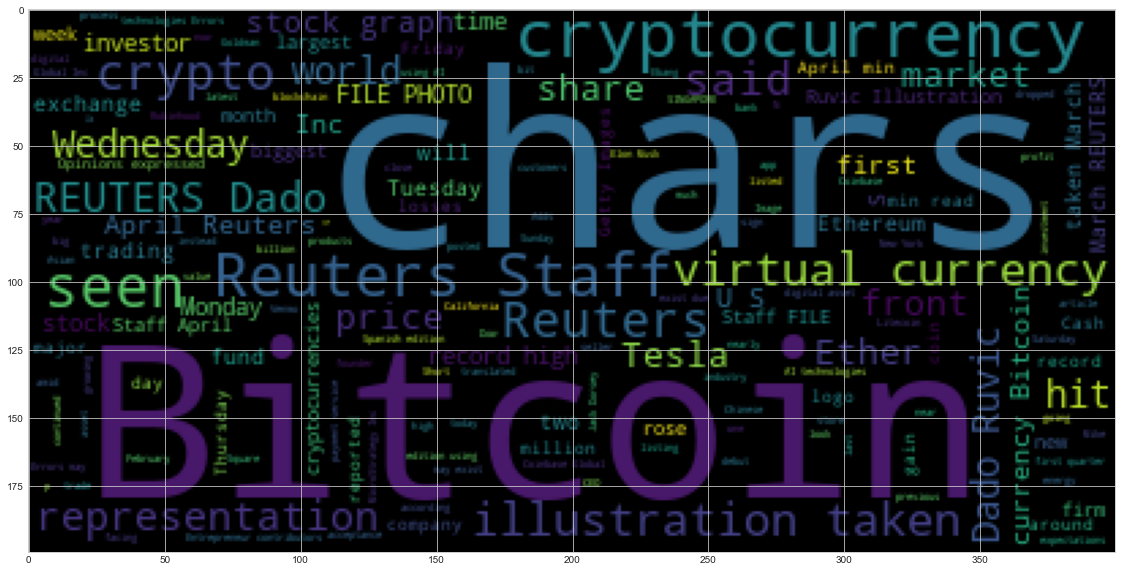

In [167]:
plt.imshow(btc_wc)

In [168]:
# Generate the Ethereum word cloud
big_string_eth = ' '.join(eth_df.text)

In [169]:
eth_wc = WordCloud().generate(big_string_eth) 

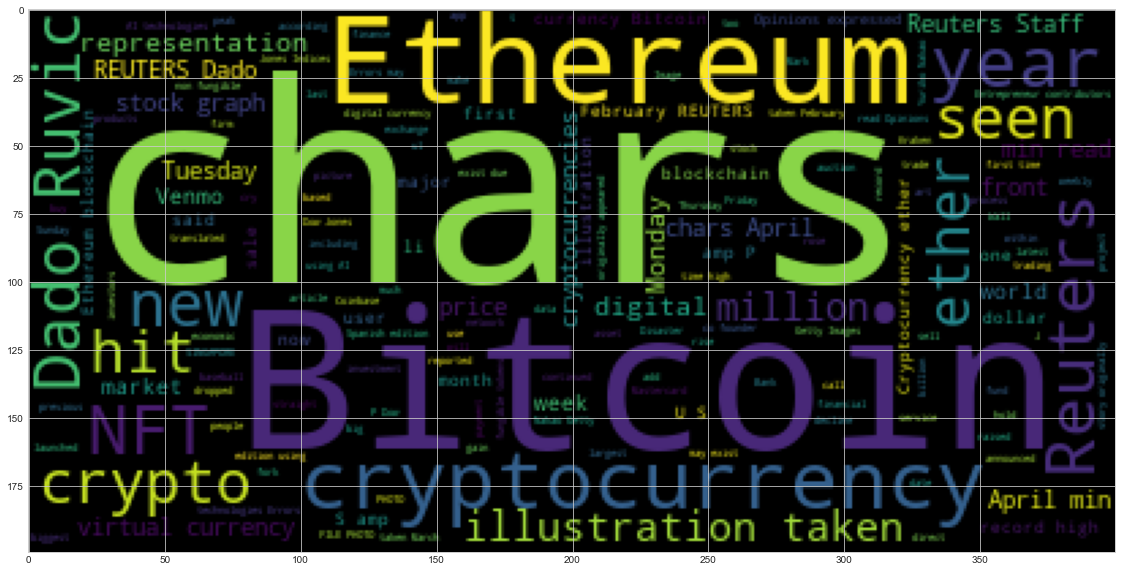

In [170]:
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [151]:
import spacy
from spacy import displacy

In [125]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [152]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [171]:
# Concatenate all of the Bitcoin text together
big_string_btc

'Tesla’s relationship with bitcoin is not a dalliance, according to the comments made by the company’s CFO and dubbed “master of coin” Zach Kirkhorn during an earnings call Monday. Instead, the compan… [+3073 chars] Cryptocurrency continues to gain mainstream acceptance, as PayPal announced that they have added Bitcoin, Ethereum, Bitcoin Cash, and Litecoin to its Venmo app. With a user base of 70 million, the mo… [+2782 chars] The crypto industry as a whole has seen a momentous year of growth, heavily spurred on by the entrance of institutional investors adopting bitcoin due to its store of value properties. The 2020 spike… [+4675 chars] Cryptocurrency prices continued to tumble Friday with Bitcoin leading the charge, with prices for the internet currency dipping below $50,000 for the first time since early March.\r\nBitcoin is down ro… [+1222 chars] image copyrightGetty Images\r\nimage captionElon Musk\'s Tesla has seen a jump in profits\r\nTesla has posted first quarter profits of $4

In [198]:
# Run the NER processor on all of the text
doc_btc = nlp(big_string_btc)

# Add a title to the document
Bitcoin_Headlines_NER = doc_btc

In [199]:
# Render the visualization
displacy.render(Bitcoin_Headlines_NER, style='ent')

In [185]:
# List all Entities
print([ent.text for ent in doc_btc.ents if ent.label_ == 'GPE'])

['New York', 'Dogecoin', 'India', 'Indi', 'Santa Clarita', 'California', 'U.S.', 'LONDON', 'Marseille', 'France', 'Australia', 'NZ', 'South Korea', 'US', 'US', "New York's", 'Groot', 'U.S.', 'Costa Mesa', 'Costa Mesa', 'California', 'U.S.', 'U.S.', 'U.S.', 'Santa Clarita', 'California', 'U.S.', 'LONDON', 'SINGAPORE', 'Singapore', 'U.S.', 'U.S.', 'Frankfurt', 'Germany', 'U.S.', 'Australia', 'NZ', 'SINGAPORE', 'NEW YORK', 'Tokyo']


---

### Ethereum NER

In [174]:
# Concatenate all of the Ethereum text together
big_string_eth

'Their investors call them disruptive innovators. Detractors like North Carolina Attorney General Josh Stein call them dirty scammers. But Leda Health co-founders Madison Campbell and Liesel Vaidya th… [+8679 chars] Cryptocurrency continues to gain mainstream acceptance, as PayPal announced that they have added Bitcoin, Ethereum, Bitcoin Cash, and Litecoin to its Venmo app. With a user base of 70 million, the mo… [+2782 chars] Venmo is jumping aboard the cryptocurrency bandwagon.\xa0\r\nThe social payment service announced on Tuesday that its customers can now buy, hold, and sell cryptocurrencies within the Venmo app.\xa0\r\nFour cr… [+1524 chars] New York (CNN Business)Bitcoin prices continued their rebound Saturday, rising about 6% to nearly $58,000. But the world\'s largest cryptocurrency has been overshadowed lately by its younger sibling, … [+866 chars] The creators behind CryptoPunks, one of the most popular NFT projects on the web, just revealed their latest project called Meebi

In [200]:
# Run the NER processor on all of the text
doc_eth = nlp(big_string_eth)

# Add a title to the document
Ethereum_Headlines_NER = doc_eth

In [201]:
# Render the visualization
displacy.render(Ethereum_Headlines_NER, style='ent')

In [182]:
# List all Entities
print([ent.text for ent in doc_eth.ents if ent.label_ == 'GPE'])

['North Carolina', 'New York', 'SINGAPORE', 'U.S.', 'Topps', 'SINGAPORE', 'SINGAPORE', 'SINGAPORE', 'Berlin', 'Topps', 'Ethereum', 'Dogecoin', 'Marseille', 'France', 'NEW YORK', 'New Y', 'N. Korea', 'LONDON', 'King County', 'Washington', 'Bloomberg', 'U.S.', 'U.S.', 'Seoul', 'U.S.']


---